In [12]:
# Import everything

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")


In [13]:
#Twitter API Login
log = pd.read_excel("login.xlsx")
key = log.values[0][0]
keySecret = log.values[1][0]
token = log.values[2][0]
access = log.values[3][0]
accessSecret = log.values[4][0]

client = tweepy.Client(token)


In [14]:
# Setup
post = client.get_users_tweets(id="1007084858760458240", tweet_fields=["text"], max_results=[100])

df = pd.DataFrame([str(lyric) for lyric in post.data], columns=["Lyrics"])
df

,Lyrics
0,Told 'em I finished school and I started my ow...
1,"I'm in love with you, but the vibe is wrong\nA..."
2,"And the day I moved to L.A., maybe that was al..."
3,"Young and we alive, whoo!\nWe never gonna die,..."
4,I been feeling all I've given\nFor my children...
...,...
95,Before they call lawyers\nBefore you tried to ...
96,"Yo Kwe, she don't believe me, please pick up t..."
97,"But by The Black Album, I was blacking out\nPa..."
98,"Yo, I'll be there in five minutes, five hours ..."


In [15]:
# Clean Text

def cleanTXT(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Replace @mention
    text = re.sub(r"#[A-Za-z0-9]+", "", text) # Remove #
    text = re.sub(r"RT[\s]+", "", text) # Remove RT
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove hyperlinks
    return text

df["Lyrics"] = df["Lyrics"].apply(cleanTXT)
df


,Lyrics
0,Told 'em I finished school and I started my ow...
1,"I'm in love with you, but the vibe is wrong\nA..."
2,"And the day I moved to L.A., maybe that was al..."
3,"Young and we alive, whoo!\nWe never gonna die,..."
4,I been feeling all I've given\nFor my children...
...,...
95,Before they call lawyers\nBefore you tried to ...
96,"Yo Kwe, she don't believe me, please pick up t..."
97,"But by The Black Album, I was blacking out\nPa..."
98,"Yo, I'll be there in five minutes, five hours ..."


In [16]:
# Create function to get subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two columns
df["Subjectivity"] = df["Lyrics"].apply(getSubjectivity)
df["Polarity"] = df["Lyrics"].apply(getPolarity)

df

,Lyrics,Subjectivity,Polarity
0,Told 'em I finished school and I started my ow...,1.000000,0.600000
1,"I'm in love with you, but the vibe is wrong\nA...",0.750000,0.000000
2,"And the day I moved to L.A., maybe that was al...",0.150000,0.100000
3,"Young and we alive, whoo!\nWe never gonna die,...",0.400000,0.128125
4,I been feeling all I've given\nFor my children...,0.600000,0.500000
...,...,...,...
95,Before they call lawyers\nBefore you tried to ...,0.000000,-0.200000
96,"Yo Kwe, she don't believe me, please pick up t...",0.625000,0.500000
97,"But by The Black Album, I was blacking out\nPa...",0.433333,-0.166667
98,"Yo, I'll be there in five minutes, five hours ...",0.500000,0.045455


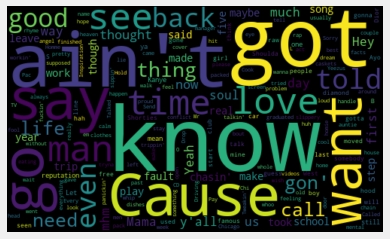

In [17]:
# Word Cloud
allWord = " ".join([twt for twt in df["Lyrics"]])
wordCloud = WordCloud(stopwords=None, width=500, height=300, random_state=21, max_font_size=119).generate(allWord)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
# Positive/Negative Analysis

def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

df["Analysis"] = df["Polarity"].apply(getAnalysis)

df

,Lyrics,Subjectivity,Polarity,Analysis
0,Told 'em I finished school and I started my ow...,1.000000,0.600000,Positive
1,"I'm in love with you, but the vibe is wrong\nA...",0.750000,0.000000,Neutral
2,"And the day I moved to L.A., maybe that was al...",0.150000,0.100000,Positive
3,"Young and we alive, whoo!\nWe never gonna die,...",0.400000,0.128125,Positive
4,I been feeling all I've given\nFor my children...,0.600000,0.500000,Positive
...,...,...,...,...
95,Before they call lawyers\nBefore you tried to ...,0.000000,-0.200000,Negative
96,"Yo Kwe, she don't believe me, please pick up t...",0.625000,0.500000,Positive
97,"But by The Black Album, I was blacking out\nPa...",0.433333,-0.166667,Negative
98,"Yo, I'll be there in five minutes, five hours ...",0.500000,0.045455,Positive


In [19]:
# Print Positive Lyrics
j=1
sortedDF = df.sort_values(by="Polarity")
for i in range (0, sortedDF.shape[0]):
    if (sortedDF["Analysis"][i] == "Positive"):
        print(str(j) + ") " + sortedDF["Lyrics"][i] + "\n")
        j += 1


1) Told 'em I finished school and I started my own business
They say "Oh you graduated?" No, I decided I was finished
   

2) And the day I moved to L.A., maybe that was all my fault
All my fault to be a real boy, chasin' the American dream
Chasin' everything we seen, up on the TV screen
   

3) Young and we alive, whoo!
We never gonna die, whoo!
   

4) I been feeling all I've given
For my children
I will die for those I love
   

5) You love me when I ain't sober
You love me when I'm hungover
Even when I blow doja
Then her auntie came over
   

6) You tried to play nice, everybody just took advantage
You left your fridge open, somebody just took a sandwich
   

7) A trunk full of coke, rental car from Avis
My mama used to say only Jesus can save us
Well mama I know I act a fool
But I'll be gone 'til November, I got packs to move
I hope
   

8) 'Cause (the good life) I always had a passion for flashin'
Befo' I had it, I closed my eyes and imagined the good life
   

9) Hold on I'll ha

In [20]:
# Print Negative Lyrics
j=1
sortedDF = df.sort_values(by=["Polarity"], ascending=False)
for i in range (0, sortedDF.shape[0]):
    if (sortedDF["Analysis"][i] == "Negative"):
        print(str(j) + ") " + sortedDF["Lyrics"][i] + "\n")
        j += 1

1) Don't trip, don't trip, that pussy slippery, no whip
We ain't trippin' on shit, we just sippin' on this
   

2) When I was negotiatin' with Apple, it was Larry and me
Told Tim Cook to call me, I was scary to see
I would've took a hundred million and gave 20 to Hov
I heard it's the way they did it when we only had a stove
   

3) I hear y'all bringin' my name up a lot
Guess I just turned the clout game up a notch
   

4) The ultimate Gemini has survived
I wasn't supposed to make it past 25
   

5) I know people wouldn't usually rap this
But I got the facts to back this
Just last year, Chicago had over 600 caskets
   

6) AKA, step, Delta, step
S.G. Rho, step, Zeta, step
Gangstas walk, pimps gon' talk
Ooh, hecky nah, that boy is raw
   

7) When I go raw, I like to leave it in
When I wake up, I like to go again
When I go to work, she gotta call it in
She can't go to work, same clothes again
   

8) Five star dishes, different exotic fishes
Man, this shit is fucking ridiculous
   

9) 

Text(0, 0.5, 'Subjectivity')

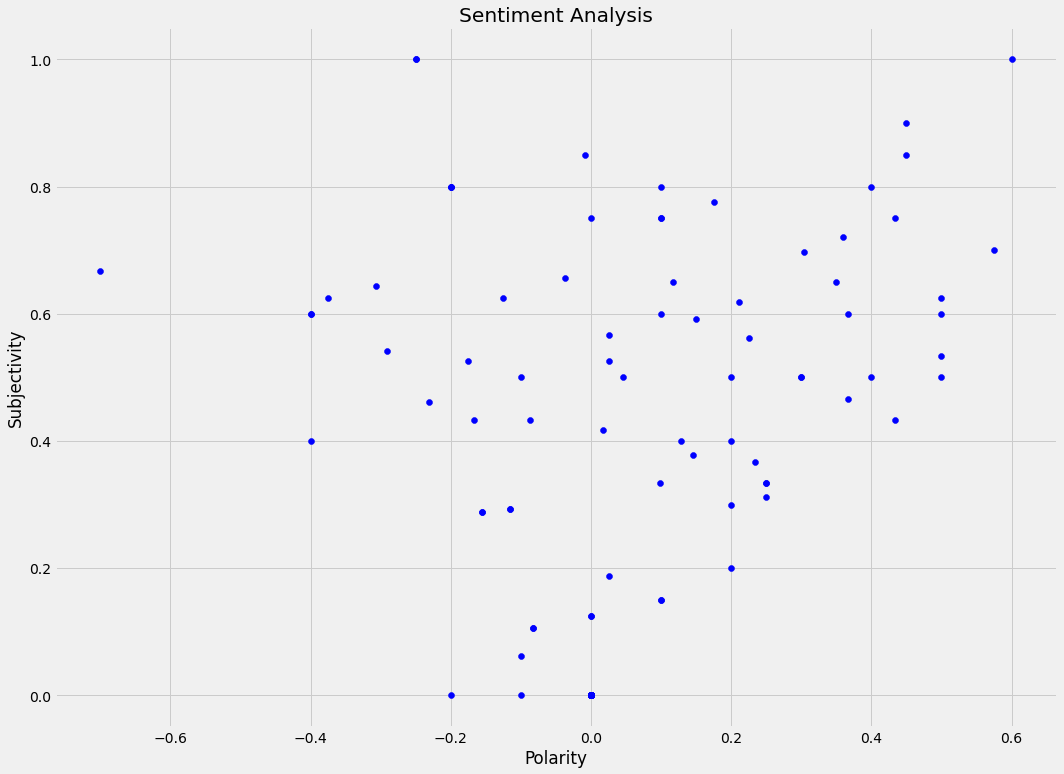

In [21]:
# Plot Polarity and Subjectivity
plt.figure(figsize=(16,12))
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color="Blue")

plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")

Precentage of positive lyrics: 46.0%
Precentage of negative lyrics: 29.0%


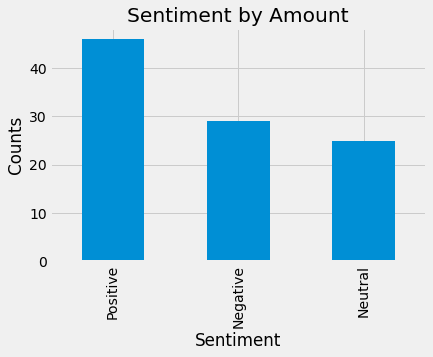

In [22]:
# Statistics of Positive/Negative

# Percentage
positiveMessage = df[df.Analysis == "Positive"]
positiveMessage = positiveMessage["Lyrics"]
print("Precentage of positive lyrics: " + str(round((positiveMessage.shape[0] / df.shape[0]) * 100, 1)) + "%")

negativeMessage = df[df.Analysis == "Negative"]
negativeMessage = negativeMessage["Lyrics"]
print("Precentage of negative lyrics: " + str(round((negativeMessage.shape[0] / df.shape[0]) * 100, 1)) + "%")

# Total Amount
df["Analysis"].value_counts()
plt.title("Sentiment by Amount")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df["Analysis"].value_counts().plot(kind="bar")
plt.show()
